# Simple Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns 
from scipy import stats 
import scipy 
from matplotlib.pyplot import figure

In [9]:
# load the data from the /input folder
soccer_data = "../input/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data)

In [10]:
# view top 3 observations from the soccer data
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [11]:
# list out the columns
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

**Exploratory Data Analysis**

In [12]:
# dataframe information - prints information about the dataframe including index, dtype and columns, non-null values, and memory usage.
# It can be used to get basic info, look for missing values, and get a sense of each variable's format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


There are 202 rows, 13 columns in the dataset. Observe that there are no null values. Out of 13 columns, 10 are float type and 1 is integer type. The remaining 2 have object dtype.

**Descriptive statistics**    
To generate descriptive statistics pandas.dataframe.describe() funtion is used.    
*Descriptive statistics* include those that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.

In [15]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


**Correlation**    
Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.     
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.

To find correlation between variables from the soccer data we will use pandas.dataframe.corr() method.

It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.

In [25]:
df.iloc[:, 2:].corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score $-0.49$ indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient $0.96$ which indicates strong positive relationship. 

Pearson correlation coefficient can only measure linear relationship between data.
The following data shows non linear relationship which can not be found by using pearson correlation coefficient. In such cases Spearman's correlation coefficient is used. It can be used to find nonlinear, monotonic relationships and for ordinal data.

**Correlation does not imply Causation!!**
 
Some studies show that people in the UK spend more money on shopping when it's cold which shows correlation between two variables. Does this imply cold weather causes people to spend more money? The answer is NO. One of the possible explanations is that cold weather coincides with Christmas and new year sales, hence people shop more.
 
Correlation between two variables indicates association between two variables but it does not mean change in one variable is caused by another.

**Relationship between Cost and Score**

Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.


To see this relationship visually, let's plot the scatter plot for Cost and Score.

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

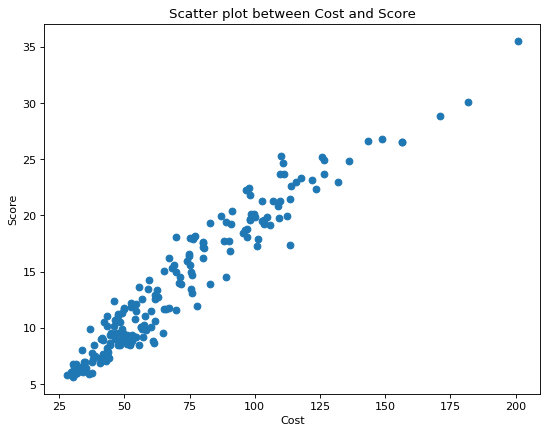

In [27]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

The correlation between Cost and Score is easily visible here.
 
The Pearson correlation and scatter plot demonstrate that as the cost increases, so does the score. But what can we do with this knowledge?
 
How can we know how much money should be spent to achieve a specific score?
This is where Linear Regression comes in. It assists us in modeling the linear relationship between two or more variables so that we may foresee the results using the model.
 
Let's figure out how.

**Train - Test Split**     
The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

In [28]:
# Assign X, y predictor and response variables
X = df['Cost']
y = df['Score']

# Splitting with 75% training and 25% testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

## Concepts

**Underfitting and Overfitting**
 
* **Underfitting**: Underfitting occurs when a statistical model or machine learning algorithm fails to capture the underlying trend of the data, i.e., it performs well on training data but poorly on testing data. Its occurrence merely indicates that our model or method does not adequately suit the data. It frequently occurs when we select a simpler model yet the data contains complicated non-linear patterns or when there is insufficient data to develop a linear model. The obvious approach is to build a complex model or increase the number of linear features in the data.
 
* **Overfitting**: When a statistical model fails to produce correct predictions on testing data, it is said to be overfitted. When a model is trained with a large amount of data, it begins to learn from the noise and incorrect data entries in our data set. It usually occurs when we build a complex model on a simpler dataset.
An overfitted model performs well on training data because it has memorized the patterns in the data, but it performs poorly on testing data. An under-fitted model, on the other hand, will perform worse on both datasets because it is unable to capture the trends and patterns underlying the dataset when training.

**Linear Regression**     
Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable. These variables are known as the independent and dependent variables, respectively.    

When there is one independent variable, it is known as **Simple Linear Regression**. When there are more independent variables, it is called **Multiple Linear Regression**.    

Mathematics behind the linear regression:    

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$

**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model.    

Linear regression serves two primary functions: understanding variable relationships and forecasting:    
- The coefficients represents the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.    
- A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.

**Errors in Regression**     
The regression line regress towards the Mean to create the best fit which essentially means that the errors are at the lowest. The regression line is not able to exactly predict the true values, there is always going to be some errors.    

Various Errors in Regression:    
- The mean absolute error (MAE) is the most basic regression error statistic. We'll compute the residuals of each data point individually, using only absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals.     
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$    

- The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.
 
$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$    

- The root mean squared error (RMSE) is another error statistic. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.
 
$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$    

- The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.
 
$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

**Finding the Best Fit Line**     
We can proceed with the Linear Regression model after determining the correlation between the variables, independent variable, and target variable, and if the variables are linearly correlated. The objective of finding the coefficients is to minimize the difference between actual values of the target variable and the predicted values.    

The Linear Regression model will determine the best fit line for the scatter of data points.
 
The equation of the regression line is :
 
$$y=\beta_0+\beta_1x$$
 
where $\beta_0$ and $\beta_1$ are regression coefficients.    

We can have infinite possibilities for the values of the regression coefficients. How do you find the best fit line out of the possible values?

**Cost Function**    
The cost function assesses how well a machine learning model performs. The cost function calculates the difference between predicted and actual values as a single real number.    

**Loss Function**    
The loss function is the error for individual data points, while the cost function is the average error of n-samples in the data.

**Residual Sum of Squares(RSS) or Sum of Squared Errors(SSE)**    
Ordinary least square or Residual Sum of squares (RSS) or Sum of Squared Errors (SSE) is minimized to find the value of β0 and β1, to find the best fit of the predicted line.
 
$$ MSE = \frac{1}{N} RSS = \frac{1}{N}\sum_{i=1}^{n}(y-\hat y)^2 $$
 
Hence,
 
$$SSE = \sum_{i=1}^{n}(y-\hat y)^2 $$
 
There are two main methods to find the coefficients of linear regression: least squares and gradient descent.
 
**Least Squares Estimators**     
One of the methods to optimize the Linear Regression equation for the minimum SSE is using Least Squares Estimators. These are the following steps involved in finding out the best fit line parameters:     
1. Differentiate the SSE with respect to $\beta_0$ and $\beta_1$     
2. Setting the partial derivatives equal to zero yields **normal equations** which can then be manipulated to find $\beta_0$ and $\beta_1$ for the minimum SSE.
  
**Gradient Descent**     
Gradient descent is an optimization algorithm that iteratively adjusts the coefficients to minimize the cost function. The cost function measures the difference between the actual and predicted values. The gradient descent algorithm updates the coefficients using the gradient of the cost function. The gradient of the cost function gives us the direction of the steepest descent, which we use to adjust the coefficients. The process is repeated until the cost function reaches a minimum.

**Linear Regression: Scikit-learn vs Statsmodels**    
Scikit-learn's LinearRegression and Statsmodels' OLS (Ordinary Least Squares) are two popular libraries for linear regression in Python. While both can be used to perform linear regression, there are some differences between them:

* Model Fitting: Scikit-learn provides a simple API for model fitting. The fit method of the LinearRegression class takes in the input features and target variable, and returns the fitted model. On the other hand, Statsmodels provides a more detailed and statistically rigorous approach to model fitting with its OLS class, which allows users to specify various model assumptions, summary statistics and hypothesis testing.

* Model Summary: Scikit-learn provides only the coefficients and their standard errors, while Statsmodels provides a more detailed summary of the regression results, including R-squared, F-statistic, p-values, and confidence intervals for the coefficients. This can be useful for hypothesis testing and model selection.

* Model Evaluation: Scikit-learn provides several evaluation metrics for regression models, such as mean squared error, mean absolute error, and R-squared. Statsmodels provides similar metrics, but also offers the ability to run hypothesis tests on the coefficients, such as t-tests and F-tests, which are useful for model selection and inference.

* Speed: Scikit-learn's LinearRegression is optimized for speed, making it a good choice for large datasets. Statsmodels' OLS is less optimized for speed, and can be slower for large datasets.

In conclusion, when it comes to choosing between the two, it depends on the specific requirements of the project. If a simple, fast, and flexible linear regression model is needed, scikit-learn's LinearRegression is a good choice. If a more detailed statistical analysis of the regression results is needed, with the ability to perform hypothesis tests and perform detailed evaluation, then Statsmodels' OLS may be a better choice.

**Point Estimator of the Mean Response**     
Point estimators of the mean response in linear regression - refer to estimates of the expected value of the response variable for a given predictor variable. These estimates are calculated using the estimated coefficients of the regression line, which are obtained through regression analysis.

In linear regression, the mean response is modeled as a linear combination of the predictor variables, where the coefficients represent the effect of each predictor on the response.      

Given a set of predictor variables, the point estimator for the mean response can be calculated by plugging in the values of the predictors into the regression equation and solving for the expected value of the response.

Point estimators are useful because they provide a quick and straightforward way to make predictions about the mean response for a given set of predictor values. However, it is important to keep in mind that point estimators are just estimates and are subject to sampling variability and other sources of error. Therefore, it is common to also provide confidence intervals or prediction intervals along with point estimators to account for uncertainty in the predictions.

**Point Estimator of the Variance**    
In linear regression, the variance of the error (also called residual variance) is a measure of the spread of the residuals around the fitted line. The residuals are the differences between the observed values and the values predicted by the regression model.

The point estimator of the variance of the error is the mean squared error (MSE) divided by the degrees of freedom (n-p-1), where n is the number of observations and p is the number of predictors in the model. The formula for the point estimator of the variance of the error is:

$\hat{\sigma}^2 = \frac{1}{n-p-1} \sum_{i=1}^n (y_i - \hat{y_i})^2$

where $\hat{y_i}$ is the predicted value for the i-th observation, and $y_i$ is the observed value.     

The MSE is a measure of the overall fit of the regression model. The smaller the MSE, the better the fit of the model. The variance of the error provides information on the spread of the residuals, which can be used to determine the reliability of the regression model.

In summary, the point estimator of the variance of the error is an important quantity in linear regression as it provides information on the spread of the residuals, which can be used to evaluate the fit of the regression model.